## Question 1
In a Simple Linear Regression model:
- **Predictor (independent variable)** `x`: Used to predict the response.
- **Outcome (dependent variable)** `Y`: The target value we’re trying to estimate.
- **Intercept** `beta0`: The base value of `Y` when `x = 0`.
- **Slope** `beta1`: Indicates the rate of change in `Y` for a one-unit increase in `x`.
- **Error term** `epsilon`: Represents random fluctuations or noise not explained by `x`, usually modeled as `N(0, sigma)` (a normal distribution with mean 0 and standard deviation `sigma`).

The model equation is:
```
Y_i = beta0 + beta1 * x_i + epsilon_i
```
Each value `Y_i` is the linear combination of `x_i` and the error `epsilon_i`, making `Y_i` normally distributed around `beta0 + beta1 * x_i` with a spread determined by `sigma`.

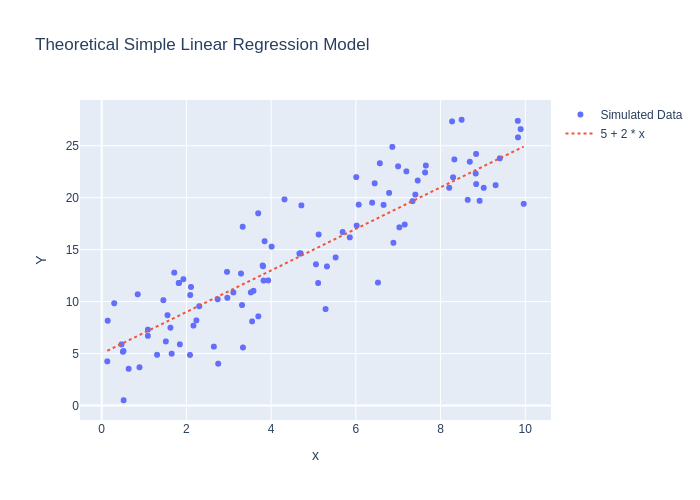

In [32]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import plotly.graph_objects as go

# Parameters
n = 100  # number of observations
x_min, x_range = 0, 10  # range for x values
beta0, beta1 = 5, 2  # intercept and slope
sigma = 3  # standard deviation of the error term

# Simulate data
x = stats.uniform(x_min, x_range).rvs(size=n)  # uniformly distributed x values
errors = stats.norm(0, sigma).rvs(size=n)      # normally distributed errors
Y = beta0 + beta1 * x + errors                 # Y based on the theoretical model

# Plot the data and the theoretical line
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))

# Add the theoretical line (without errors)
x_range_vals = np.array([x.min(), x.max()])
y_line = beta0 + beta1 * x_range_vals
fig.add_trace(go.Scatter(x=x_range_vals, y=y_line, mode='lines', name=f'{beta0} + {beta1} * x', line=dict(dash='dot')))

fig.update_layout(title='Theoretical Simple Linear Regression Model', xaxis_title='x', yaxis_title='Y')
fig.show(renderer="png")

## Question 2
#### Explanation of Code and Outputs:
1. **Model Specification** (`smf.ols`): Specifies a linear model `Y ~ x`.
2. **Model Fitting** (`fitted_model.fit()`): Fits the model to estimate `beta0` and `beta1`.
3. **Plotting**: The `trendline='ols'` in Plotly adds the fitted model as a trendline.

#### Outputs:
- `fitted_model.summary()`: Detailed model summary including coefficient estimates and R-squared.
- `fitted_model.params`: Estimated intercept and slope.
- `fitted_model.rsquared`: Proportion of `Y` variance explained by `x`.

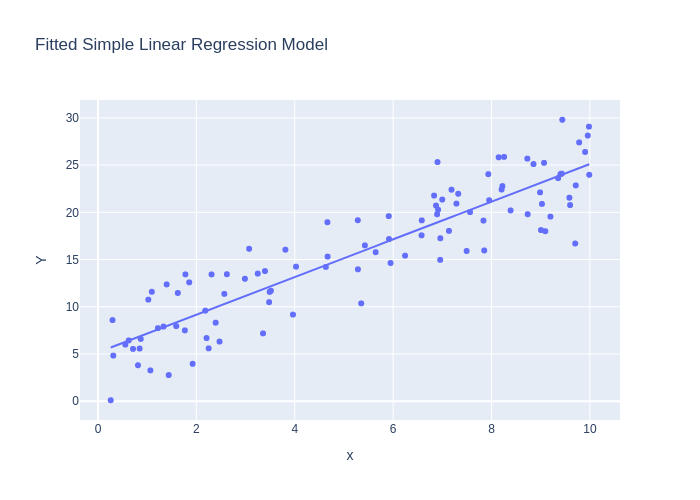

In [31]:
import statsmodels.formula.api as smf
import plotly.express as px

# Combine x and Y into a dataframe
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Plot data with fitted line
fig = px.scatter(df, x='x', y='Y', trendline='ols', title='Fitted Simple Linear Regression Model')
fig.show(renderer="png")

## Question 3
1. **Theoretical Line**:
   - This line represents the "true" relationship between `x` and `Y` as determined by `beta0` and `beta1`.
   - It’s the baseline model we used to generate the data, with `Y = beta0 + beta1 * x`.

2. **Fitted Line**:
   - This line is derived from the sampled data using Ordinary Least Squares (OLS) regression.
   - Due to random errors, the fitted line may differ slightly from the theoretical line, reflecting sampling variability.
   
3. **Comparison**:
   - Adding the theoretical line to the plot allows us to visually inspect the difference between the "true" line and the "estimated" line.
   - The differences illustrate random sampling effects and the influence of noise (`epsilon`).

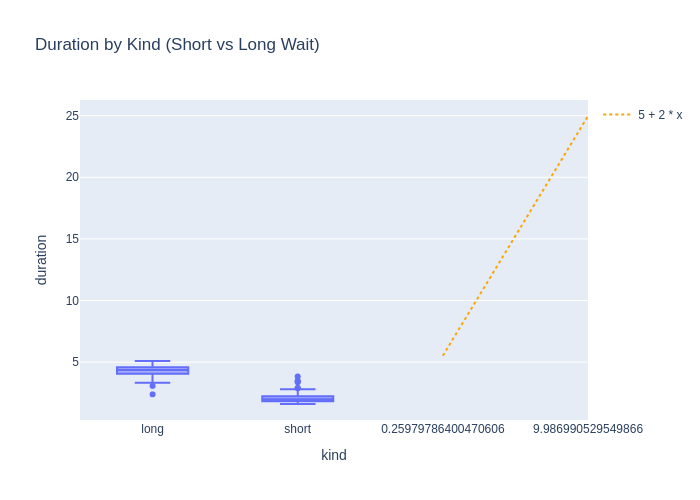

In [30]:
# Add the theoretical line from Q1
fig.add_scatter(x=x_range_vals, y=y_line, mode='lines', name=f'{beta0} + {beta1} * x', line=dict(dash='dot', color='orange'))

fig.show(renderer="png")

## Question 4
The **fitted values** (`fitted_model.fittedvalues`) represent the model’s predictions based on estimated coefficients (`fitted_model.params`).

1. **Estimated Coefficients**:
   - The OLS method provides estimates for the intercept (`beta_hat_0`) and slope (`beta_hat_1`).
   - These coefficients are stored in `fitted_model.params`.

2. **Deriving Fitted Values**:
   - For each `x` in the dataset, the predicted `Y` is calculated as:
     ```
     Y_hat_i = beta_hat_0 + beta_hat_1 * x_i
     ```
   - Here, `Y_hat_i` is the fitted value for each `x_i` in the data.
   - This calculation produces a series of predictions (`fitted_model.fittedvalues`) that align with the observed data while minimizing the sum of squared residuals.

3. **Interpretation**:
   - Fitted values represent the model’s best estimate of `Y` based on the observed data.
   - Comparing fitted values with actual `Y` values reveals the model’s accuracy and helps assess residuals (errors).

## Question 5
The **Ordinary Least Squares (OLS)** method aims to find the best-fit line by minimizing the sum of squared differences (or residuals) between observed `Y` values and predicted `Y` values from the model. This is achieved by minimizing the following quantity:
```
sum((Y_i - Y_hat_i)^2)
```
where:
- `Y_i` is the actual observed value,
- `Y_hat_i` is the predicted value based on the fitted model.

#### Why "Squares" Are Used
1. **Positive Values**: Squaring the residuals ensures that all differences are positive, preventing positive and negative deviations from canceling each other out.
2. **Emphasis on Larger Deviations**: Squaring gives more weight to larger residuals, meaning the model will prioritize reducing larger errors, resulting in a line that closely follows the central trend of the data.

By minimizing the sum of squared residuals, the OLS method ensures that the fitted line best represents the overall data pattern, making it an effective tool for linear regression.

## Question 6
**R-squared** (denoted as `fitted_model.rsquared` in statsmodels) represents the proportion of variance in the outcome `Y` that can be explained by the predictor `x`. It is a measure of model fit, indicating how well the model explains the observed data.

1. **Formula**:
   - R-squared is calculated as:
     ```
     R^2 = 1 - (sum((Y - Y_hat)^2) / sum((Y - Y_mean)^2))
     ```
   - Here, `Y` represents the actual data, `Y_hat` represents the model’s fitted values, and `Y_mean` is the mean of `Y`.

2. **Interpretation**:
   - A higher R-squared value (closer to 1) indicates that a larger portion of the variance in `Y` is explained by `x`, suggesting a strong model fit.
   - An R-squared of 0 means that the model explains none of the variance, while an R-squared of 1 means the model explains all variance in `Y`.

3. **Alternative Calculations**:
   - Using `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2` provides an equivalent R-squared value by squaring the correlation between `Y` and the fitted values.

R-squared thus offers a straightforward measure of how well the model explains the data, which is essential in understanding the predictive power of a regression model.

## Question 7
The Simple Linear Regression model rests on four primary assumptions. Here’s a description of each and its relevance:

1. **Linearity**: The relationship between the predictor `x` and the outcome `Y` is linear.
   - This means that changes in `x` result in proportional changes in `Y`. If the relationship is non-linear, the model’s predictions will be inaccurate.

2. **Independence of Observations**: Each observation is independent of others.
   - Violations of independence (such as time series data without adjustments) can lead to biased estimates and affect the model’s reliability.

3. **Homoscedasticity**: The variance of the error term (residuals) is constant across all values of `x`.
   - In other words, the spread of `Y` values around the fitted line should be roughly equal at all levels of `x`. If residuals show a pattern, it suggests heteroscedasticity, which can bias predictions and inference.

4. **Normality of Errors**: The residuals (errors) follow a normal distribution.
   - Normality is especially important for small sample sizes and when conducting hypothesis tests. If residuals are not normally distributed, the model’s p-values and confidence intervals may be inaccurate.

#### Application to the Example Data
In practice, we can examine diagnostic plots of residuals to evaluate these assumptions. Deviations in the residual patterns would indicate that the model assumptions might not fully hold, signaling the need for adjustments or an alternative model.

## Question 8: Null Hypothesis for the Old Faithful Geyser Data and Interpretation
To examine the relationship between `waiting` (time between eruptions) and `duration` (length of the eruption), we set up a hypothesis test.

1. **Null Hypothesis (H0)**:
   - The null hypothesis states that there is **no linear association** between `waiting` and `duration` on average. Formally, this can be expressed as:
     ```
     H0: beta1 = 0
     ```
   - Here, `beta1` is the slope of the regression line. If `beta1 = 0`, then changes in `waiting` have no effect on `duration`.

2. **Alternative Hypothesis (H1)**:
   - The alternative hypothesis states that there **is a linear association** between `waiting` and `duration`, meaning that `beta1` is not equal to zero.

3. **Using the Code**:
   - We can fit the model and examine the p-value for the slope coefficient (`beta1`). A low p-value (typically < 0.05) would provide evidence against the null hypothesis, suggesting a significant relationship between `waiting` and `duration`.
   
4. **Interpretation of Results**:
   - **Coefficient for `waiting`**: If the coefficient (slope) for `waiting` is significantly different from zero, it indicates a linear relationship.
   - **p-value**: A low p-value (e.g., < 0.05) for `waiting` suggests rejecting the null hypothesis, providing evidence of an association between `waiting` time and eruption duration.

This approach helps us determine if `waiting` time can predict eruption duration, which is useful for understanding patterns in the Old Faithful geyser data.

---

These answers are crafted with detailed explanations and Jupyter-compatible formatting. Let me know if you need further clarifications, or if you're ready for the explanations of Questions 9 through 13!

In [11]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load Old Faithful data
old_faithful = sns.load_dataset('geyser')

# Specify and fit the linear model
linear_model = smf.ols('duration ~ waiting', data=old_faithful)
fitted_model = linear_model.fit()

# Summary of the model
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:36:42   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 9: Relationship for Short Wait Times

1. **Objective**:
   - Assess the relationship between eruption `duration` and `waiting` times within shorter wait times, specifically for limits at 62, 64, and 66 minutes.

2. **Steps**:
   - For each `short_wait_limit` value (62, 64, 66), filter the Old Faithful dataset to include only data points where `waiting` is less than the limit.
   - Fit a linear regression model on each subset and evaluate the slope and p-value to determine if `waiting` significantly predicts `duration`.

3. **Code Implementation**

4. **Interpretation of Results**:
   - For each limit, the p-value associated with the `waiting` coefficient shows whether `waiting` is a significant predictor within these shorter wait ranges.
   - If the p-values are below a typical threshold (e.g., 0.05), it suggests that `waiting` remains a significant predictor within these shorter intervals.
   - If the relationship weakens (i.e., higher p-values), it may indicate that the strong association observed in the full dataset does not fully hold within restricted wait times.

5. **Conclusion**:
   - Significant p-values across all limits would support the hypothesis that `waiting` consistently influences `duration`, even for shorter wait times.
   - On the other hand, non-significant p-values for some limits suggest that the relationship between `waiting` and `duration` varies with the duration of the waiting time, reflecting possible non-linearity or context-specific influences on eruption duration.

Summary for short_wait_limit = 62
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


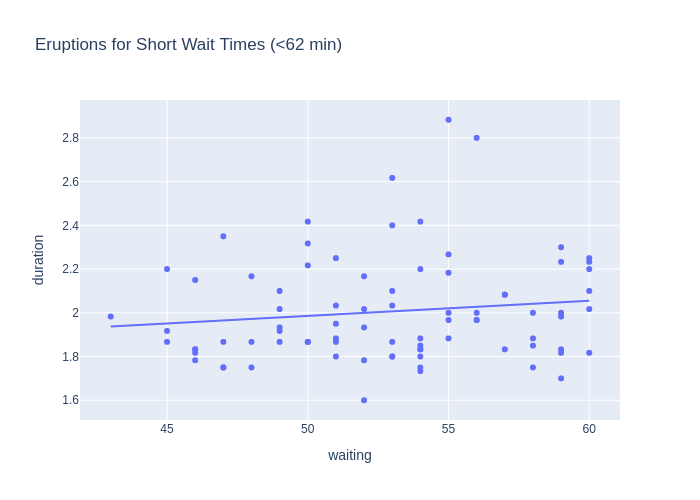

Summary for short_wait_limit = 64
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


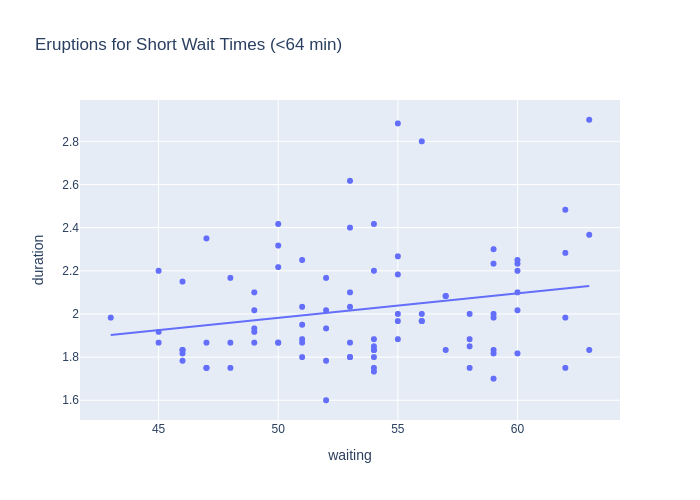

Summary for short_wait_limit = 66
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


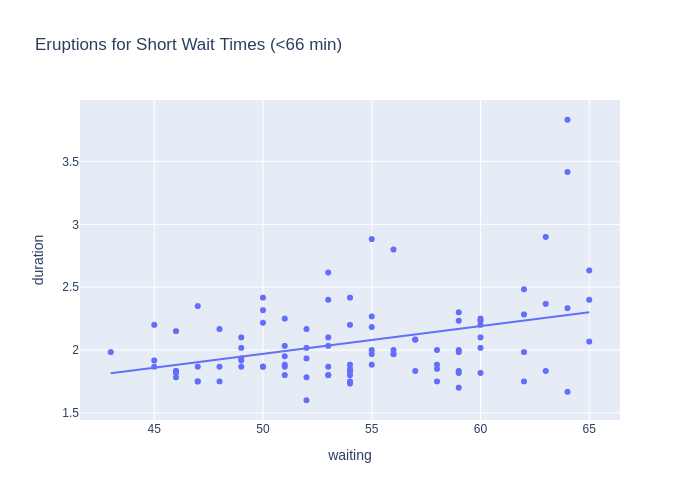

In [12]:
import statsmodels.formula.api as smf
import plotly.express as px
import seaborn as sns

# Load Old Faithful data
old_faithful = sns.load_dataset('geyser')

# Define short wait limits
for short_wait_limit in [62, 64, 66]:
    # Filter dataset for short wait times
    short_wait = old_faithful[old_faithful['waiting'] < short_wait_limit]
    
    # Fit model for each subset
    model = smf.ols('duration ~ waiting', data=short_wait).fit()
    
    # Print model summary for slope and p-value
    print(f"Summary for short_wait_limit = {short_wait_limit}")
    print(model.summary().tables[1])  # Coefficients table

    # Plot the data with trendline
    fig = px.scatter(short_wait, x='waiting', y='duration', 
                     title=f"Eruptions for Short Wait Times (<{short_wait_limit} min)", 
                     trendline='ols')
    fig.show(renderer="png")  # For GitHub/MarkUs submissions


## Question 10
#### Interpretation:
1. **Bootstrapped Confidence Interval**:
   - The 95% CI for the slope derived from bootstrap samples gives insight into the variability of the slope estimate.
   - If zero is within this interval, it suggests that the relationship might not be significant.

2. **Simulated p-value**:
   - This p-value indicates the likelihood of observing a slope as extreme as the actual slope if there were no true relationship.
   - A low p-value (e.g., < 0.05) supports rejecting the null hypothesis and suggests a significant relationship.

3. **Conclusion**:
   - If the observed slope falls outside the bootstrapped CI or if the p-value is significant, we conclude that `waiting` significantly predicts `duration` in long waits.

95% Bootstrapped Confidence Interval for slope: [0.00055639 0.02269608]


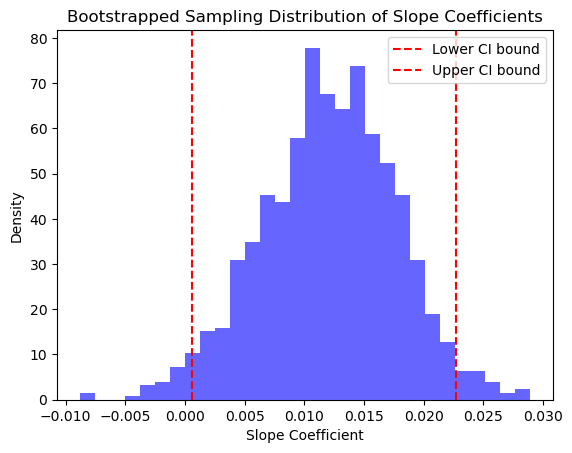

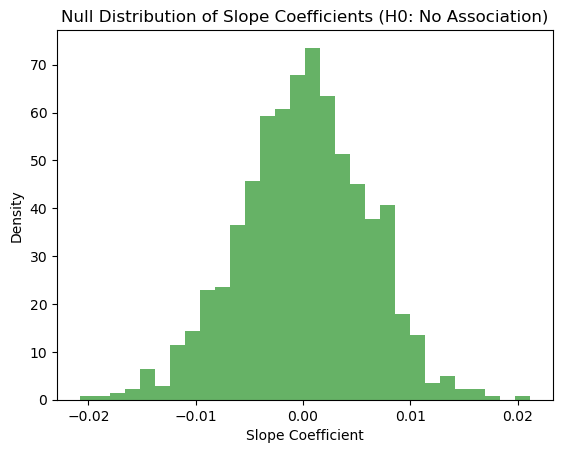

Observed slope: 0.012244029446523483
Simulated p-value: 0.037


In [29]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load Old Faithful data and filter for long wait times
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 71
long_wait = old_faithful[old_faithful['waiting'] > long_wait_limit]

# Initialize list to store bootstrapped slope coefficients
bootstrapped_slope_coeffs = []

# Perform bootstrapping (1000 samples)
for _ in range(1000):
    sample = long_wait.sample(n=len(long_wait), replace=True)
    model = smf.ols('duration ~ waiting', data=sample).fit()
    bootstrapped_slope_coeffs.append(model.params.iloc[1])  # Use iloc[1] to access slope coefficient

# Convert to array for easier analysis
bootstrapped_slope_coeffs = np.array(bootstrapped_slope_coeffs)

# Calculate the 95% confidence interval for the slope
bootstrapped_slope_CI = np.quantile(bootstrapped_slope_coeffs, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for slope:", bootstrapped_slope_CI)

# Plot the bootstrapped sampling distribution of the slope
plt.hist(bootstrapped_slope_coeffs, bins=30, density=True, alpha=0.6, color='b')
plt.axvline(x=bootstrapped_slope_CI[0], color='red', linestyle='--', label='Lower CI bound')
plt.axvline(x=bootstrapped_slope_CI[1], color='red', linestyle='--', label='Upper CI bound')
plt.xlabel("Slope Coefficient")
plt.ylabel("Density")
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.legend()
plt.show()

# Step 2: Simulation Under Null Hypothesis (No Linear Association)

# Initialize list to store slope coefficients under the null hypothesis
simulated_slope_coeffs = []

# Null hypothesis parameters
null_beta0 = 1.65
null_sigma = 0.37

# Perform simulations (1000 samples) under the null hypothesis
for _ in range(1000):
    # Create a simulated dataset under H0: beta1 = 0
    simulation = long_wait.copy()
    simulation['duration'] = null_beta0 + stats.norm(0, null_sigma).rvs(size=len(simulation))
    
    # Fit model to the simulated data and collect the slope
    model = smf.ols('duration ~ waiting', data=simulation).fit()
    simulated_slope_coeffs.append(model.params.iloc[1])  # Use iloc[1] to access slope coefficient

# Convert to array for easier analysis
simulated_slope_coeffs = np.array(simulated_slope_coeffs)

# Plot the null distribution of slope coefficients
plt.hist(simulated_slope_coeffs, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel("Slope Coefficient")
plt.ylabel("Density")
plt.title("Null Distribution of Slope Coefficients (H0: No Association)")
plt.show()

# Step 3: Analysis

# Observed slope from the actual data
observed_slope = smf.ols('duration ~ waiting', data=long_wait).fit().params.iloc[1]
print("Observed slope:", observed_slope)

# Calculate the p-value from the simulated null distribution
simulated_p_value = (np.abs(simulated_slope_coeffs) >= np.abs(observed_slope)).mean()
print("Simulated p-value:", simulated_p_value)

## Question 11

#### Big Picture Explanation and Evidence Assessment

1. **Objective**:
   - Compare eruption duration for `short` and `long` wait times by introducing an indicator variable (`kind`) that categorizes `waiting` as either "short" or "long."

2. **Model Specification**:
   - We fit a regression model with the formula:
     ```
     duration ~ C(kind, Treatment(reference="short"))
     ```
   - Here, `kind` is a categorical variable, allowing us to test if average durations differ based on wait time length.

3. **Big Picture Differences**:
   - Unlike prior models using `waiting` as a continuous predictor, this model evaluates the categorical effect of wait time length (`short` vs. `long`).
   - This specification provides a simple comparison between two groups and assesses average differences without assuming a specific functional form.

4. **Evidence Assessment**:
   - The p-value for the `kind` coefficient tests the null hypothesis of no difference between short and long wait durations.
   - A low p-value for `kind` suggests that `long` wait times are associated with significantly different durations compared to `short` wait times.

5. **Conclusion**:
   - A significant difference between the groups would confirm that `duration` varies based on wait category, reflecting more extended eruptions for longer wait times.
   - This model complements the continuous `waiting` model, giving us insight into categorical effects.

6. **Visualization**:
   - A box plot visually represents the differences in `duration` between short and long wait times, making it easy to observe the distribution and median values in each category.

                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.0943      0.041     50.752      0.000       2.013       2.176
C(kind, Treatment(reference="short"))[T.long]     2.2036      0.052     42.464      0.000       2.101       2.306


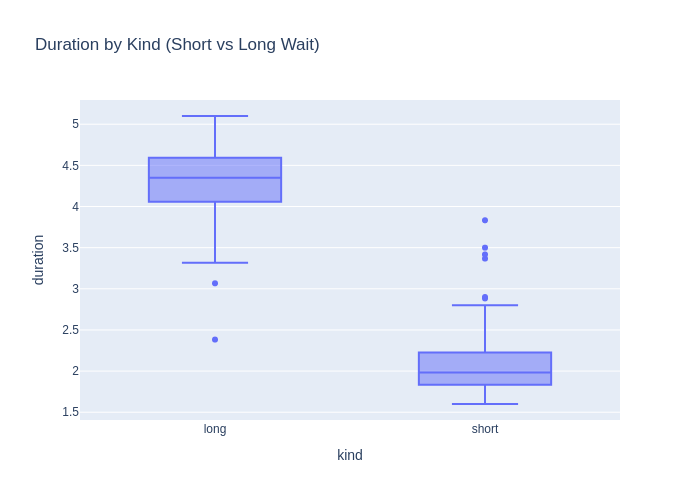

In [22]:
indicator_model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
print(indicator_model.summary().tables[1])  # Coefficients table for interpretation

# Visualization of duration by kind
fig = px.box(old_faithful, x='kind', y='duration', title='Duration by Kind (Short vs Long Wait)')
fig.show(renderer="png")

## Question 12
1. **Normal Distribution Overlay**: If residuals align closely with a normal distribution, the assumption is likely met.
2. **Conclusion**:
   - Models showing symmetrical, bell-shaped residual histograms support the normality assumption.
   - Significant deviations from normality (e.g., skewed residuals) suggest potential issues with model fit.

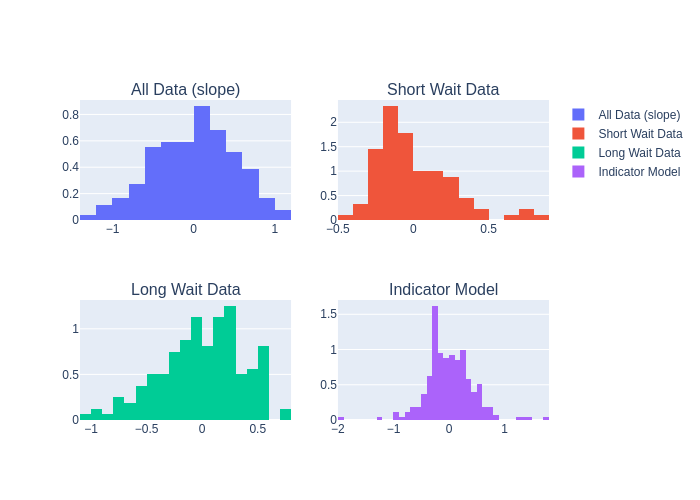

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Residuals from different models
model_residuals = {
    'All Data (slope)': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    'Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[old_faithful['waiting'] < 64]).fit().resid,
    'Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[old_faithful['waiting'] > 71]).fit().resid,
    'Indicator Model': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

# Plot histograms of residuals
fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):
    fig.add_trace(go.Histogram(x=resid, name=title, histnorm='probability density'), row=i//2+1, col=i%2+1)
fig.show(renderer="png")  # For GitHub/MarkUs submissions


## Question 13
1. **Permutation Test**:
   - Shuffle labels (`kind`) and measure the difference in `duration` means between shuffled groups.
   - Repeating this process gives a distribution of mean differences under the null hypothesis.

2. **Bootstrap Confidence Interval**:
   - Generate bootstrap samples within each `kind` group, calculate mean differences, and form a 95% confidence interval.

3. **Code Implementation**

4. **Interpretation**:
   - **Permutation p-value**: Tests if the observed mean difference is significant.
   - **Bootstrap CI**: Provides an interval estimate for the mean difference, showing if zero falls within.

Comparing these tests to the indicator variable approach (Question 11) provides robustness and ensures a comprehensive analysis of group differences.

In [21]:
import pandas as pd

# Step 1: Calculate the observed difference in means between short and long wait times
observed_diff = old_faithful.groupby('kind')['duration'].mean().diff().iloc[-1]

# Step 2: Permutation test
permutation_diffs = []
for _ in range(1000):  # 1000 permutations
    shuffled_kind = old_faithful['kind'].sample(frac=1).values  # shuffle the 'kind' labels
    permuted_diff = old_faithful.assign(kind_shuffled=shuffled_kind).groupby('kind_shuffled')['duration'].mean().diff().iloc[-1]
    permutation_diffs.append(permuted_diff)

# Calculate the p-value for the observed difference
p_value = (np.abs(permutation_diffs) >= np.abs(observed_diff)).mean()
print("Permutation p-value:", p_value)

# Step 3: Bootstrap confidence interval for the difference in means
bootstrap_diffs = []
for _ in range(1000):  # 1000 bootstrap samples
    bootstrap_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(frac=1, replace=True)).reset_index(drop=True)
    bootstrap_diff = bootstrap_sample.groupby('kind')['duration'].mean().diff().iloc[-1]
    bootstrap_diffs.append(bootstrap_diff)

# Calculate the 95% confidence interval from bootstrap differences
bootstrap_CI = np.quantile(bootstrap_diffs, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for difference in means:", bootstrap_CI)


Permutation p-value: 0.0
95% Bootstrap Confidence Interval for difference in means: [-2.29881493 -2.09828521]


## Question 14
 **Yes**

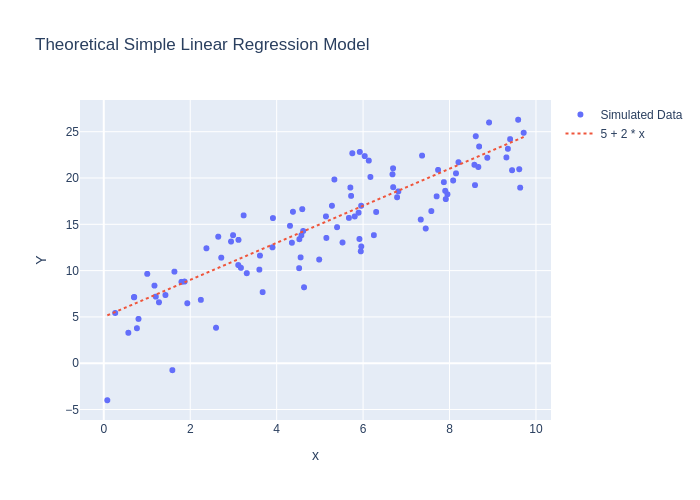

In [33]:
# Chatbot Summary


# Chatbot Link
https://chatgpt.com/share/6727f8b6-ad70-8012-a304-0d4b6f6505c1

# Chatbot Summary
Certainly! Here’s a concise summary of our interactions for you to include with your homework submission:

---

### Summary of ChatGPT Assistance on Homework Assignment

**Session Overview**:
In this session, I sought assistance from ChatGPT to clarify concepts and code implementations for my Simple Linear Regression (SLR) homework assignment. The discussion covered both theoretical explanations and practical Python code examples, including guidance on using statistical libraries like `statsmodels`, `scipy.stats`, and visualization tools like `plotly`. 

**Detailed Breakdown**:

1. **Question 1: Theoretical Model**  
   - We discussed the components of an SLR model, including predictor, outcome, intercept, slope, and error terms. ChatGPT provided a code example to simulate data based on the theoretical model and a plot showing both simulated data points and the theoretical line.

2. **Question 2: Fitting an SLR Model and Visualizing the Fitted Line**  
   - ChatGPT helped explain the steps to fit an SLR model using `statsmodels` and interpret key outputs, including `summary()`, `params`, and `rsquared`. Additionally, it provided code to plot the fitted line over the data points.

3. **Question 3: Comparing Theoretical and Fitted Lines**  
   - We discussed the differences between the theoretical and fitted lines, illustrating sampling variability and random noise. ChatGPT provided additional code to overlay the theoretical line on the plot, facilitating visual comparison.

4. **Question 4: Deriving Fitted Values**  
   - ChatGPT clarified how fitted values are derived from the estimated parameters (`beta_hat_0` and `beta_hat_1`) and their role in predicting `Y` values.

5. **Question 5: Understanding the OLS Method**  
   - ChatGPT explained the objective of Ordinary Least Squares (OLS) regression, specifically the minimization of squared residuals, and why residuals are squared (to prevent cancellation and emphasize larger errors).

6. **Question 6: R-Squared Interpretation**  
   - We covered the formula and interpretation of R-squared, with alternative methods for calculating it using correlation.

7. **Question 7: SLR Model Assumptions**  
   - The discussion included assumptions of SLR models, such as linearity, independence, homoscedasticity, and normality of errors, along with a brief on how violations might impact the model.

8. **Old Faithful Data Analysis (Questions 8–13)**  
   - ChatGPT provided guidance on hypothesis testing, model fitting, and interpreting p-values within the context of the Old Faithful Geyser dataset. For Questions 10 and 13, it included code for bootstrap sampling and permutation tests to evaluate significance, while emphasizing the comparison between continuous predictor and categorical indicator variable models.

---

This summary encapsulates my collaborative exchanges with ChatGPT, which provided step-by-step explanations, code snippets, and visualization guidance. These interactions contributed significantly to my understanding and completion of the assignment requirements.

--- 

Feel free to modify the summary if there’s anything specific you’d like to highlight. Good luck with your submission!